<a href="https://colab.research.google.com/github/galbaaee/prosaindata/blob/main/20-166_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('dataset_baru.csv')
data.head()


,id,Abstrak,Kategori
0,0,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,1,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,2,Web server adalah sebuah perangkat lunak serve...,RPL
3,3,Penjadwalan kuliah di Perguruan Tinggi me...,KOMPUTASI
4,4,Seiring perkembangan teknologi yang ada diduni...,RPL


In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Abstrak'])
print(X)

  (0, 4517)	0.08355302418372819
  (0, 5913)	0.11572912311101395
  (0, 3784)	0.06888124943878117
  (0, 929)	0.09280640772901813
  (0, 7234)	0.10902465865442816
  (0, 2467)	0.0847784175784213
  (0, 6386)	0.07939747881584652
  (0, 2276)	0.07331705988742339
  (0, 8615)	0.03378331397418877
  (0, 4080)	0.08134505003802021
  (0, 8424)	0.041884243122203124
  (0, 1029)	0.21804931730885632
  (0, 886)	0.06661259543083758
  (0, 6712)	0.04709066581731634
  (0, 961)	0.046452160083682366
  (0, 7996)	0.05868273757955867
  (0, 2171)	0.06661259543083758
  (0, 1833)	0.02174974541786077
  (0, 4690)	0.1124933749763292
  (0, 5936)	0.020117621456063137
  (0, 8432)	0.1951266019268605
  (0, 1852)	0.11572912311101395
  (0, 1902)	0.01735534142122253
  (0, 974)	0.0363613700640933
  (0, 4431)	0.03455807972709924
  :	:
  (804, 7790)	0.03858135959890343
  (804, 6428)	0.04573315011191919
  (804, 7214)	0.0796193445327912
  (804, 1370)	0.05246753402409701
  (804, 8579)	0.06328691282367518
  (804, 8424)	0.03953820343890

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
print(X_pca)

[[-0.05551254 -0.07324943]
 [-0.03899813 -0.0017788 ]
 [-0.04646413  0.00275697]
 ...
 [ 0.23486252 -0.00464156]
 [ 0.10238571  0.0003228 ]
 [ 0.0551386  -0.00426838]]


In [6]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

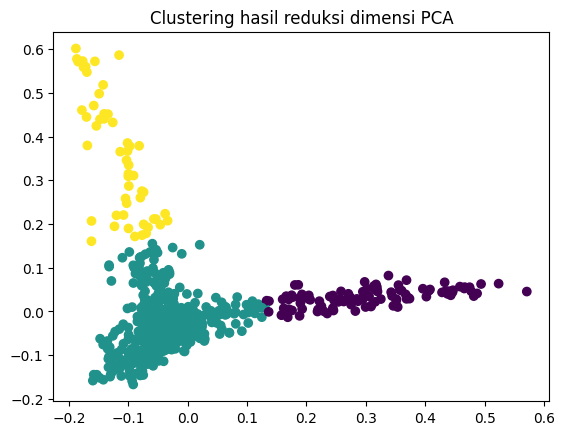

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering hasil reduksi dimensi PCA')
plt.show()